In [106]:
import pandas as pd
import numpy as np

In [107]:
df = pd.read_csv("./abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [110]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Rings')

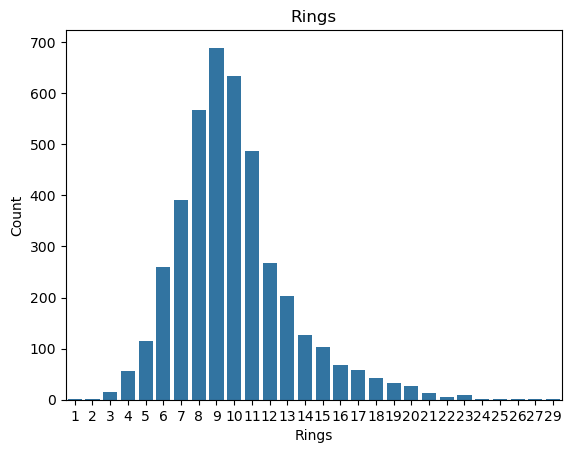

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Rings")

In [113]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [114]:
#########회귀에서는 연속적인 값을 예측하는 것이므로 라벨인코딩 진행XXXXXX

# from sklearn.preprocessing import LabelEncoder
# # LabelEncoder 객체 생성 후 라벨인코딩 수행
# label_encoder = LabelEncoder()
# df['Rings'] = label_encoder.fit_transform(df['Rings'])

In [115]:
# df['Rings'].value_counts()

In [116]:
# 결측치 확인 후 제거
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [117]:
# 원핫 인코딩 (Sex 열만)
df_sex_encoded = pd.get_dummies(df['Sex'], prefix='Sex')

# 숫자형으로 변환
df_sex_encoded = df_sex_encoded.astype(int)

# 원래 데이터프레임과 원핫 인코딩된 데이터프레임 합치기
df = pd.concat([df.drop('Sex', axis=1), df_sex_encoded], axis=1)

In [118]:
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1


In [123]:
X=df.drop('Rings',axis=1)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


In [127]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [128]:
X = X.values
X.shape

(4177, 10)

In [130]:
# 0,1 로 표현하는 원핫인코딩
from tensorflow.keras.utils import to_categorical

Y = to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [133]:
print(X.dtype)
print(Y.dtype)

float64
float64


In [136]:
# dtype이 맞지 않을 경우 실행
# X=X.astype('float64')
# X.dtype

In [138]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [140]:
# 윈도우 크기를 설정하고, 데이터를 3차원으로 변환 (타임스텝 적용)
def create_windows(X, y, window_size):
    X_windows = []
    y_windows = []
    for i in range(len(X) - window_size):
        X_windows.append(X[i:i+window_size])  # window_size만큼의 과거 데이터를 사용
        y_windows.append(y[i+window_size])    # 그 다음 값을 예측
    return np.array(X_windows), np.array(y_windows)

In [142]:
window_size = 3  # 3개의 타임스텝을 사용
X_windows, Y_windows = create_windows(X_scaled, Y, window_size)
print (X_windows)
print (Y_windows)

[[[0.51351351 0.5210084  0.0840708  ... 0.         0.         1.        ]
  [0.37162162 0.35294118 0.07964602 ... 0.         0.         1.        ]
  [0.61486486 0.61344538 0.11946903 ... 1.         0.         0.        ]]

 [[0.37162162 0.35294118 0.07964602 ... 0.         0.         1.        ]
  [0.61486486 0.61344538 0.11946903 ... 1.         0.         0.        ]
  [0.49324324 0.5210084  0.11061947 ... 0.         0.         1.        ]]

 [[0.61486486 0.61344538 0.11946903 ... 1.         0.         0.        ]
  [0.49324324 0.5210084  0.11061947 ... 0.         0.         1.        ]
  [0.34459459 0.33613445 0.07079646 ... 0.         1.         0.        ]]

 ...

 [[0.65540541 0.6302521  0.13716814 ... 0.         0.         1.        ]
  [0.66216216 0.66386555 0.1460177  ... 1.         0.         0.        ]
  [0.69594595 0.64705882 0.11946903 ... 0.         0.         1.        ]]

 [[0.66216216 0.66386555 0.1460177  ... 1.         0.         0.        ]
  [0.69594595 0.64705882

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_windows, Y_windows, test_size=0.2, random_state=0)

In [146]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(window_size, X_train.shape[2]), return_sequences=True))  # 타임스텝=3, 특성=10
model.add(Dropout(0.2))  # Dropout 레이어 추가
model.add(LSTM(32, activation='relu'))  # 두 번째 LSTM 레이어
model.add(Dropout(0.2))  # Dropout 레이어 추가
model.add(Dense(64, activation='relu'))  # Fully Connected Layer
model.add(Dropout(0.5))  # Dropout 레이어 추가
model.add(Dense(1))  # 출력층: 연속적인 값을 예측 (단일 출력)

# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # 회귀에 적합한 손실 함수

C:\Users\82107\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [148]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# 예측
y_pred = model.predict(X_test)

Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 0.0324 - mae: 0.0619 - val_loss: 0.0322 - val_mae: 0.0632
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0322 - mae: 0.0640 - val_loss: 0.0322 - val_mae: 0.0642
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0322 - mae: 0.0644 - val_loss: 0.0322 - val_mae: 0.0643
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0322 - mae: 0.0644 - val_loss: 0.0322 - val_mae: 0.0644
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0322 - mae: 0.0644 - val_loss: 0.0322 - val_mae: 0.0644
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0322 - mae: 0.0644 - val_loss: 0.0322 - val_mae: 0.0644
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0322 - mae: 0.0644 - val_loss: 0.0322 - val_mae: 0.0644
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0322 - mae: 0.0644 - val_loss: 0.0322 - val_mae: 0.0644
Epoch 9/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms

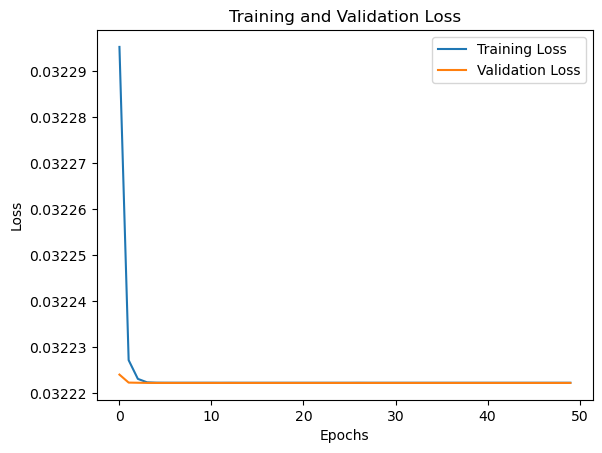

In [149]:
# Loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

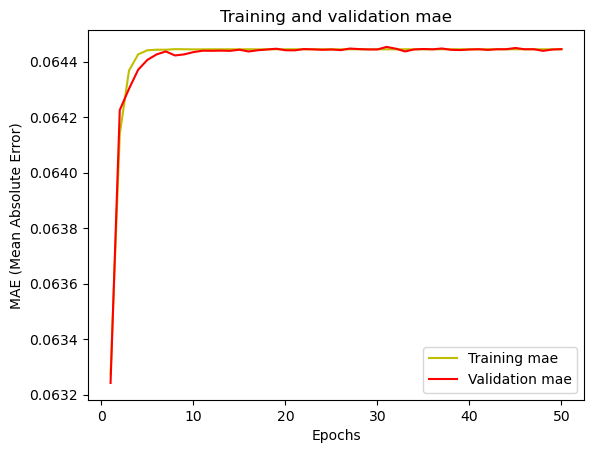

In [150]:
mae =history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs, mae, 'y', label='Training mae')
plt.plot(epochs, val_mae, 'r', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE (Mean Absolute Error)')
plt.legend()
plt.show()

In [100]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0322 - mae: 0.0644


[0.032222215086221695, 0.06444397568702698]